# Business Problem 


Bir e-ticaret şirketi müşterilerini segmentlere ayırıp bu segmentlere göre pazarlama stratejileri belirlemek istiyor.

Buna yönelik olarak müşterilerin davranışlarını tanımlayacağız ve bu davranışlarda öbeklenmelere göre gruplar oluşturacağız.

Yani ortak davranışlar sergileyenleri aynı gruplara alacağız ve bu gruplara özel satış ve pazarlama teknikleri geliştirmeye çalışacağız.

**Veri Seti Hikayesi**

https://archive.ics.uci.edu/ml/datasets/Online+Retail+II

Online Retail II isimli veri seti İngiltere merkezli online bir satış mağazasının 01/12/2009 - 09/12/2011 tarihleri arasındaki satışlarını içeriyor.

Bu şirket hediyelik eşya satıyor. Promosyon ürünleri gibi düşünebilir.

Müşterilerinin çoğu da toptancı.

**Değişkenler**

- InvoiceNo: Fatura numarası. Her işleme yani faturaya ait eşsiz numara. Eğer bu kod C ile başlıyorsa işlemin iptal edildiğini ifade eder.
- StockCode: Ürün kodu. Her bir ürün için eşsiz numara.
- Description: Ürün ismi
- Quantity: Ürün adedi. Faturalardaki ürünlerden kaçar tane satıldığını ifade etmektedir.
- InvoiceDate: Fatura tarihi ve zamanı. 
- UnitPrice: Ürün fiyatı (Sterlin cinsinden)
- CustomerID: Eşsiz müşteri numarası
- Country: Ülke ismi. Müşterinin yaşadığı ülke.


### K-MEANS YONTEMI - CLUSTER => 111.hucreden basliyor


# Data Understanding 

In [119]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=FutureWarning)
# to display all columns and rows:
pd.set_option('display.max_columns', None); pd.set_option('display.max_rows', None);

#virgulden sonra gösterilecek olan sayı sayısı
pd.set_option('display.float_format', lambda x: '%.2f' % x)
import matplotlib.pyplot as plt

In [48]:
df_2010_2011 = pd.read_excel("online_retail.xlsx", sheet_name = "Year 2010-2011")

In [26]:
df = df_2010_2011.copy()

In [49]:
#pandas bölümünde veriye ilk bakış olarak kullanılabilecek fonksiyonları kullanarak veriyi anlamaya çalışınız.

In [50]:
#essiz urun sayisi nedir?
df["Description"].nunique()

3896

In [51]:
#hangi urunden kacar tane var?
df["Description"].value_counts().head()

WHITE HANGING HEART T-LIGHT HOLDER    2070
REGENCY CAKESTAND 3 TIER              1905
JUMBO BAG RED RETROSPOT               1662
ASSORTED COLOUR BIRD ORNAMENT         1418
PARTY BUNTING                         1416
Name: Description, dtype: int64

In [52]:
#en cok siparis edilen urun hangisi?
df.groupby('Description').agg({'Quantity':'sum'}).head()

,Quantity
Description,
4 PURPLE FLOCK DINNER CANDLES,140
50'S CHRISTMAS GIFT BAG LARGE,1883
DOLLY GIRL BEAKER,2391
I LOVE LONDON MINI BACKPACK,360
I LOVE LONDON MINI RUCKSACK,1


In [53]:
#yukarıdaki çıktıyı nasil siralariz?
df.groupby("Description").agg({"Quantity":"sum"}).sort_values("Quantity", ascending = False).head()

,Quantity
Description,
WORLD WAR 2 GLIDERS ASSTD DESIGNS,53215
JUMBO BAG RED RETROSPOT,45066
ASSORTED COLOUR BIRD ORNAMENT,35314
WHITE HANGING HEART T-LIGHT HOLDER,34147
PACK OF 72 RETROSPOT CAKE CASES,33409


In [54]:
#toplam kac fatura kesilmiştir?
df['Invoice'].nunique()

22190

In [55]:
#fatura basina toplam kac para kazanilmistir? (iki değişkeni çarparak yeni bir değişken oluşturmak gerekmektedir)
df['TotalPrice'] = df['Quantity']*df['Price']

In [56]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.00,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.00,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom,20.34


In [57]:
df.groupby('Invoice').agg({'TotalPrice':'sum'}).head()

,TotalPrice
Invoice,
536365,139.12
536366,22.20
536367,278.73
536368,70.05
536369,17.85


In [58]:
df.sort_values('Price', ascending = False).head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
222681,C556445,M,Manual,-1,2011-06-10 15:31:00,38970.00,15098.00,United Kingdom,-38970.00
173277,C551685,POST,POSTAGE,-1,2011-05-03 12:51:00,8142.75,16029.00,United Kingdom,-8142.75
173382,551697,POST,POSTAGE,1,2011-05-03 13:46:00,8142.75,16029.00,United Kingdom,8142.75
173391,C551699,M,Manual,-1,2011-05-03 14:12:00,6930.00,16029.00,United Kingdom,-6930.00
268027,C560372,M,Manual,-1,2011-07-18 12:26:00,4287.63,17448.00,United Kingdom,-4287.63


In [59]:
#hangi ulkeden kac siparis geldi?
df["Country"].value_counts()

United Kingdom          361878
Germany                   9495
France                    8492
EIRE                      7485
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               1877
Portugal                  1480
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
USA                        291
Israel                     250
Unspecified                244
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon                     45
Lithuani

In [60]:
#hangi ulke ne kadar kazandırdı?
df.groupby("Country").agg({"TotalPrice":"sum"}).sort_values("TotalPrice", ascending = False).head()

,TotalPrice
Country,
United Kingdom,6767873.39
Netherlands,284661.54
EIRE,250285.22
Germany,221698.21
France,196730.84


In [61]:
#en cok iade alan urun hangisidir?
df.groupby("Description").agg({"Quantity":"sum"}).sort_values("Quantity", ascending = True).head(20)

,Quantity
Description,
ROTATING SILVER ANGELS T-LIGHT HLDR,-1460
Discount,-1194
ASSORTED TUTTI FRUTTI ROUND BOX,-24
CRUK Commission,-16
PINK POODLE HANGING DECORATION,-12
ROBIN CHRISTMAS CARD,-9
WHITE CHERRY LIGHTS,-8
BLUE PADDED SOFT MOBILE,-6
VINTAGE GOLD TINSEL REEL,-6


# Data Preparation

In [62]:
df.isnull().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
TotalPrice     0
dtype: int64

In [63]:
df.dropna(inplace = True)

In [64]:
df.shape

(406830, 9)

In [65]:
df.describe([0.01,0.05,0.10,0.25,0.50,0.75,0.90,0.95, 0.99]).T

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,95%,99%,max
Quantity,406830.00,12.06,248.69,-80995.00,-2.00,1.00,1.00,2.00,5.00,12.00,24.00,36.00,120.00,80995.00
Price,406830.00,3.46,69.32,0.00,0.21,0.42,0.55,1.25,1.95,3.75,6.75,8.50,15.00,38970.00
Customer ID,406830.00,15287.68,1713.60,12346.00,12415.00,12626.00,12876.00,13953.00,15152.00,16791.00,17719.00,17905.00,18212.00,18287.00
TotalPrice,406830.00,20.40,427.59,-168469.60,-9.90,0.85,1.65,4.20,11.10,19.50,35.40,67.20,199.68,168469.60


In [66]:
for feature in ["Quantity","Price","TotalPrice"]:

    Q1 = df[feature].quantile(0.01)
    Q3 = df[feature].quantile(0.99)
    IQR = Q3-Q1
    upper = Q3 + 1.5*IQR
    lower = Q1 - 1.5*IQR

    if df[(df[feature] > upper) | (df[feature] < lower)].any(axis=None):
        print(feature,"yes")
        print(df[(df[feature] > upper) | (df[feature] < lower)].shape[0])
    else:
        print(feature, "no")

Quantity yes
948
Price yes
846
TotalPrice yes
1030


# RFM Skorları ile Müşteri Segmentasyonu

Recency, Frequency, Monetary ifadelerinin baş harflerinden oluşur.

Müşterilerin satın alma alışkanlıkları üzerinden pazarlama ve satış stratejileri belirlemeye yardımcı olan bir tekniktir.

- Recency (yenilik): Müşterinin son satın almasından bugüne kadar geçen süre

    -- Diğer bir ifadesiyle “Müşterinin son temasından bugüne kadar geçen süre” dir.

    -- Bugünün tarihi - Son satın alma

    -- Örnek verecek olursak bugün bu analizi yapıyorsak bugünün tarihi - son 	ürün satın alma tarihi.

    -- Bu örneğin 20 olabilir 100 olabilir. Biliriz ki 20 olan müşteri daha sıcaktır. Daha son zamanlarda bizimle teması olmuştur.

- Frequency (Sıklık): Toplam satın alma sayısı.

- Monetary (Parasal Değer): Müşterinin yaptığı toplam harcama.


In [67]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.00,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.00,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom,20.34


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406830 entries, 0 to 541909
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      406830 non-null  object        
 1   StockCode    406830 non-null  object        
 2   Description  406830 non-null  object        
 3   Quantity     406830 non-null  int64         
 4   InvoiceDate  406830 non-null  datetime64[ns]
 5   Price        406830 non-null  float64       
 6   Customer ID  406830 non-null  float64       
 7   Country      406830 non-null  object        
 8   TotalPrice   406830 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 31.0+ MB


In [69]:
df['InvoiceDate'].min()

Timestamp('2010-12-01 08:26:00')

In [70]:
df['InvoiceDate'].max()

Timestamp('2011-12-09 12:50:00')

In [71]:
#Bugün nedir? Şimdi eğer günümüz tarihini alırsak bu durumda arada çok ciddi bir fark olacaktır.

#Bu sebeple örnek olması açısından kendimize bu veri setinin yapısına göre bir "bugün" belirleyelim.

#Bu günü veri setinin maksimum günü olarak belirleyebiliriz. 

#Son kayıt düşülen güne göre segmentasyon yapabiliriz.

In [72]:
import datetime as dt
today_date = dt.datetime(2011,12,9)

In [73]:
today_date

datetime.datetime(2011, 12, 9, 0, 0)

In [74]:
df.groupby('Customer ID').agg({'InvoiceDate':'max'}).head()

,InvoiceDate
Customer ID,
12346.00,2011-01-18 10:17:00
12347.00,2011-12-07 15:52:00
12348.00,2011-09-25 13:13:00
12349.00,2011-11-21 09:51:00
12350.00,2011-02-02 16:01:00


In [75]:
#Su an her bir müşterinin son alışveriş tarihleri elimizde.

#Customer ID'ler buu şekli ile bi rahatsız etti. Ondalık. Onu düzeltelim.

In [76]:
df["Customer ID"] = df["Customer ID"].astype(int)

In [77]:
(today_date-df.groupby('Customer ID').agg({'InvoiceDate':'max'})).head()

,InvoiceDate
Customer ID,
12346,324 days 13:43:00
12347,1 days 08:08:00
12348,74 days 10:47:00
12349,17 days 14:09:00
12350,309 days 07:59:00


In [78]:
temp_df = (today_date-df.groupby('Customer ID').agg({'InvoiceDate':'max'}))

In [79]:
temp_df.rename(columns={"InvoiceDate": "Recency"}, inplace = True)

In [80]:
temp_df.head()

,Recency
Customer ID,
12346,324 days 13:43:00
12347,1 days 08:08:00
12348,74 days 10:47:00
12349,17 days 14:09:00
12350,309 days 07:59:00


In [81]:
recency_df = temp_df['Recency'].apply(lambda x: x.days)

In [82]:
recency_df.head()

Customer ID
12346    324
12347      1
12348     74
12349     17
12350    309
Name: Recency, dtype: int64

In [83]:
#df.groupby("Customer ID").agg({"InvoiceDate": lambda x: (today_date - x.max()).days}).head()

# Frequency

In [84]:
temp_df = df.groupby(["Customer ID","Invoice"]).agg({"Invoice":"count"})

In [85]:
temp_df.head()

Invoice
Customer ID Invoice         
12346       541431         1
            C541433        1
12347       537626        31
            542237        29
            549222        24

In [86]:
temp_df.groupby('Customer ID').agg({'Invoice':'count'}).head()

,Invoice
Customer ID,
12346,2
12347,7
12348,4
12349,1
12350,1


In [87]:
freq_df = temp_df.groupby('Customer ID').agg({'Invoice':'count'})
freq_df.rename(columns={'Invoice':'Frequency'}, inplace = True)
freq_df.head()

,Frequency
Customer ID,
12346,2
12347,7
12348,4
12349,1
12350,1


# Monetary

In [88]:
monetary_df = df.groupby("Customer ID").agg({"TotalPrice":"sum"})

In [89]:
monetary_df.head()

,TotalPrice
Customer ID,
12346,0.00
12347,4310.00
12348,1797.24
12349,1757.55
12350,334.40


In [90]:
monetary_df.rename(columns={"TotalPrice": "Monetary"}, inplace = True)

In [91]:
rfm = pd.concat([recency_df, freq_df, monetary_df],  axis=1)

In [92]:
rfm.head()

,Recency,Frequency,Monetary
Customer ID,,,
12346,324,2,0.00
12347,1,7,4310.00
12348,74,4,1797.24
12349,17,1,1757.55
12350,309,1,334.40


In [93]:
rfm["RecencyScore"] = pd.qcut(rfm['Recency'], 5, labels = [5, 4, 3, 2, 1])

In [94]:
rfm["FrequencyScore"] = pd.qcut(rfm['Frequency'].rank(method='first'), 5, labels = [1, 2, 3, 4, 5])

In [95]:
rfm["MonetaryScore"] = pd.qcut(rfm['Monetary'], 5, labels = [1, 2, 3, 4, 5])

In [96]:
rfm.head()

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore
Customer ID,,,,,,
12346,324,2,0.00,1,2,1
12347,1,7,4310.00,5,4,5
12348,74,4,1797.24,2,3,4
12349,17,1,1757.55,4,1,4
12350,309,1,334.40,1,1,2


In [97]:
(rfm['RecencyScore'].astype(str) + 
 rfm['FrequencyScore'].astype(str) + 
 rfm['MonetaryScore'].astype(str)).head()

Customer ID
12346    121
12347    545
12348    234
12349    414
12350    112
dtype: object

In [98]:
rfm["RFM_SCORE"] = rfm['RecencyScore'].astype(str) + rfm['FrequencyScore'].astype(str) + rfm['MonetaryScore'].astype(str)

In [99]:
rfm.head()

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_SCORE
Customer ID,,,,,,,
12346,324,2,0.00,1,2,1,121
12347,1,7,4310.00,5,4,5,545
12348,74,4,1797.24,2,3,4,234
12349,17,1,1757.55,4,1,4,414
12350,309,1,334.40,1,1,2,112


In [100]:
rfm.describe().T

,count,mean,std,min,25%,50%,75%,max
Recency,4372.00,90.58,100.77,-1.00,15.00,49.00,142.00,372.00
Frequency,4372.00,5.08,9.34,1.00,1.00,3.00,5.00,248.00
Monetary,4372.00,1898.46,8219.34,-4287.63,293.36,648.08,1611.72,279489.02


In [101]:
rfm[rfm["RFM_SCORE"] == "555"].head()

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_SCORE
Customer ID,,,,,,,
12362,2,13,5154.58,5,5,5,555
12417,2,12,3578.80,5,5,5,555
12437,0,19,4896.66,5,5,5,555
12471,1,49,18740.92,5,5,5,555
12476,0,20,6546.58,5,5,5,555


In [102]:
rfm[rfm["RFM_SCORE"] == "111"].head()

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_SCORE
Customer ID,,,,,,,
12353,203,1,89.00,1,1,1,111
12361,286,1,189.90,1,1,1,111
12401,302,1,84.30,1,1,1,111
12402,322,1,225.60,1,1,1,111
12441,365,1,173.55,1,1,1,111


In [103]:
seg_map = {
    r'[1-2][1-2]': 'Hibernating',
    r'[1-2][3-4]': 'At Risk',
    r'[1-2]5': 'Can\'t Loose',
    r'3[1-2]': 'About to Sleep',
    r'33': 'Need Attention',
    r'[3-4][4-5]': 'Loyal Customers',
    r'41': 'Promising',
    r'51': 'New Customers',
    r'[4-5][2-3]': 'Potential Loyalists',
    r'5[4-5]': 'Champions'
}

In [104]:
rfm['Segment'] = rfm['RecencyScore'].astype(str) + rfm['FrequencyScore'].astype(str)
rfm['Segment'] = rfm['Segment'].replace(seg_map, regex=True)
rfm.head()

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_SCORE,Segment
Customer ID,,,,,,,,
12346,324,2,0.00,1,2,1,121,Hibernating
12347,1,7,4310.00,5,4,5,545,Champions
12348,74,4,1797.24,2,3,4,234,At Risk
12349,17,1,1757.55,4,1,4,414,Promising
12350,309,1,334.40,1,1,2,112,Hibernating


In [105]:
rfm[["Segment", "Recency","Frequency","Monetary"]].groupby("Segment").agg(["mean","count"])

Recency       Frequency       Monetary      
                       mean count      mean count     mean count
Segment                                                         
About to Sleep        51.05   369      1.29   369   434.66   369
At Risk              156.65   603      3.31   603   951.20   603
Can't Loose          132.09    68      9.82    68  2380.58    68
Champions              4.08   665     14.59   665  6509.56   665
Hibernating          216.22  1053      1.20  1053   375.90  1053
Loyal Customers       31.29   795      7.99   795  2702.86   795
Need Attention        47.73   190      2.64   190   790.44   190
New Customers          5.24    42      1.00    42   377.23    42
Potential Loyalists   14.57   490      2.22   490   684.41   490
Promising             21.10    97      1.00    97   303.06    97

In [106]:
rfm[rfm["Segment"] == "Need Attention"].head()

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_SCORE,Segment
Customer ID,,,,,,,,
12360,51,3,2662.06,3,3,5,335,Need Attention
12370,50,4,3545.69,3,3,5,335,Need Attention
12372,70,3,1298.04,3,3,4,334,Need Attention
12546,45,3,1141.50,3,3,4,334,Need Attention
12759,51,3,1531.44,3,3,4,334,Need Attention


In [107]:
rfm[rfm["Segment"] == "New Customers"].index

Int64Index([12367, 12442, 12478, 12587, 12650, 12660, 12713, 12953, 12966,
            13017, 13153, 13188, 13298, 13349, 13428, 13436, 13560, 13790,
            13844, 14204, 14219, 14349, 14480, 14569, 14578, 14601, 14804,
            15097, 15148, 15195, 15318, 15471, 15520, 15539, 15540, 15619,
            15721, 15773, 15783, 15790, 15904, 15992],
           dtype='int64', name='Customer ID')

In [108]:
new_df = pd.DataFrame()
new_df["NewCustomerID"] = rfm[rfm["Segment"] == "New Customers"].index

In [109]:
new_df.head()

,NewCustomerID
0,12367
1,12442
2,12478
3,12587
4,12650


In [110]:
new_df.to_csv("new_customers_2010_2011.csv")

# K-MEANS YONTEMI - CLUSTER

In [111]:
rfm_kmeans = pd.concat([recency_df, freq_df, monetary_df],  axis=1)

In [112]:
rfm_kmeans.head()

,Recency,Frequency,Monetary
Customer ID,,,
12346,324,2,0.00
12347,1,7,4310.00
12348,74,4,1797.24
12349,17,1,1757.55
12350,309,1,334.40


In [122]:
from sklearn.preprocessing import MinMaxScaler

In [123]:
sc = MinMaxScaler((0,1))

In [124]:
rfm_kmeans = sc.fit_transform(rfm_kmeans)

In [125]:
rfm_kmeans

array([[0.87131367, 0.00404858, 0.01510917],
       [0.00536193, 0.0242915 , 0.03029717],
       [0.20107239, 0.01214575, 0.02144246],
       ...,
       [0.01876676, 0.00809717, 0.01573149],
       [0.0080429 , 0.06072874, 0.02249131],
       [0.11260054, 0.00809717, 0.02158356]])

In [126]:
kmeans = KMeans(n_clusters = 4)

In [127]:
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [128]:
k_fit = kmeans.fit(rfm_kmeans)

In [129]:
k_fit

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [130]:
k_fit.n_clusters

4

In [131]:
k_fit.cluster_centers_

array([[0.04842192, 0.02723592, 0.02602095],
       [0.51005792, 0.00498936, 0.0171829 ],
       [0.21445227, 0.00828547, 0.01852063],
       [0.82944081, 0.00216831, 0.01637697]])

In [132]:
k_fit.labels_

array([3, 0, 2, ..., 0, 0, 0])

# Kümelerin Görselleştirilmesi

In [134]:
k_means = KMeans(n_clusters = 2).fit(rfm_kmeans)

In [135]:
kumeler = k_means.labels_

In [136]:
kumeler

array([1, 0, 0, ..., 0, 0, 0])

In [138]:
rfm_kmeans = pd.DataFrame(rfm_kmeans)

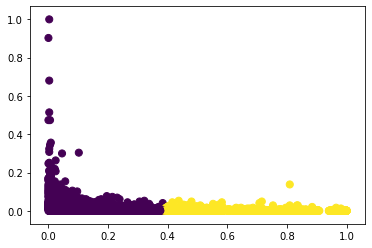

In [139]:
plt.scatter(rfm_kmeans.iloc[:,0], rfm_kmeans.iloc[:,1], c = kumeler, s = 50, cmap = "viridis");

In [140]:
merkezler = k_means.cluster_centers_

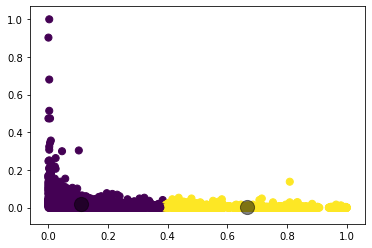

In [141]:
plt.scatter(rfm_kmeans.iloc[:,0], rfm_kmeans.iloc[:,1], c = kumeler, s = 50, cmap = "viridis")
plt.scatter(merkezler[:,0], merkezler[:,1], c = "black", s = 200, alpha=0.5);

# Optimum Küme Sayısının Belirlenmesi

In [142]:
kmeans = KMeans(n_clusters = 4)
k_fit = kmeans.fit(rfm_kmeans)

In [143]:
?k_fit

Type:        KMeans
String form:
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)
File:        c:\users\ts-omer.ari\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py
Docstring:  
K-Means clustering.

Read more in the :ref:`User Guide <k_means>`.

Parameters
----------

n_clusters : int, default=8
    The number of clusters to form as well as the number of
    centroids to generate.

init : {'k-means++', 'random'} or ndarray of shape             (n_clusters, n_features), default='k-means++'
    Method for initialization, defaults to 'k-means++':

    'k-means++' : selects initial cluster centers for k-mean
    clustering in a smart way to speed up convergence. See section
    Notes in k_init for more details.

    'random': choose k observations (rows) at random from data for
    the initial centroids.

    If an ndarray is passed, it shoul

In [144]:
ssd = []

K = range(1,30)

for k in K:
    kmeans = KMeans(n_clusters = k).fit(rfm_kmeans)
    ssd.append(kmeans.inertia_)

In [145]:
ssd

[328.95450381733104,
 75.22698978295699,
 40.56605337494388,
 26.951611748358783,
 20.162296700379983,
 15.953283398892077,
 12.657954542160969,
 10.702445810324328,
 9.26792100261823,
 7.988179475317285,
 6.770029735073765,
 5.723002600445943,
 4.995720923719265,
 4.39490764410907,
 3.8802753897783395,
 3.553277763743658,
 3.3141065365837683,
 2.9945062495827077,
 2.7986448667115837,
 2.5900921501559213,
 2.436832780961174,
 2.290194664008936,
 2.141490050176116,
 2.048009835869011,
 1.9241736895690464,
 1.8322093575774017,
 1.735764113594624,
 1.7039343290310973,
 1.603792992525881]

Text(0.5, 1.0, 'Optimum Küme sayısı için Elbow Yöntemi')

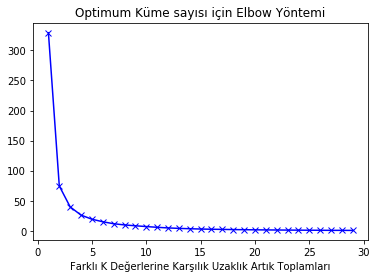

In [146]:
plt.plot(K, ssd, "bx-")
plt.xlabel("Farklı K Değerlerine Karşılık Uzaklık Artık Toplamları")
plt.title("Optimum Küme sayısı için Elbow Yöntemi")

In [147]:
#!pip install yellowbrick

In [148]:
from yellowbrick.cluster import KElbowVisualizer

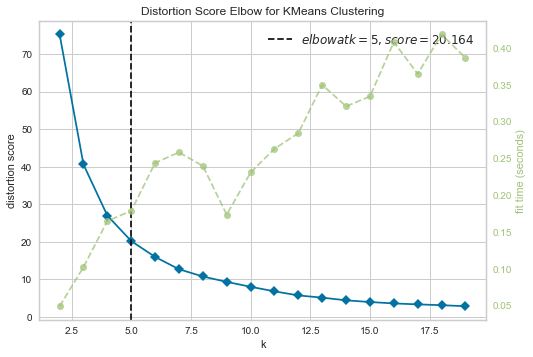

In [149]:
kmeans = KMeans()
visu = KElbowVisualizer(kmeans, k = (2,20))
visu.fit(rfm_kmeans)
visu.poof();

In [165]:
kmeans = KMeans(n_clusters = 6).fit(rfm_kmeans)
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [166]:
kumeler = kmeans.labels_

In [167]:
kumeler

array([4, 1, 0, ..., 1, 1, 1])

In [168]:
rfm_copy = pd.concat([recency_df, freq_df, monetary_df],  axis=1)

In [169]:
rfm_copy.head()

,Recency,Frequency,Monetary
Customer ID,,,
12346,324,2,0.00
12347,1,7,4310.00
12348,74,4,1797.24
12349,17,1,1757.55
12350,309,1,334.40


In [170]:
pd.DataFrame({"Customer ID": rfm_copy.index, "Kumeler": kumeler})

,Customer ID,Kumeler
0,12346,4
1,12347,1
2,12348,0
3,12349,1
4,12350,4
5,12352,1
6,12353,2
7,12354,2
8,12355,2
9,12356,1


In [171]:
rfm_copy["cluster_no"] = kumeler

In [172]:
rfm_copy.head()

,Recency,Frequency,Monetary,cluster_no
Customer ID,,,,
12346,324,2,0.00,4
12347,1,7,4310.00,1
12348,74,4,1797.24,0
12349,17,1,1757.55,1
12350,309,1,334.40,4


In [173]:
rfm_copy["cluster_no"] = rfm_copy["cluster_no"] + 1

In [174]:
rfm_copy.head()

,Recency,Frequency,Monetary,cluster_no
Customer ID,,,,
12346,324,2,0.00,5
12347,1,7,4310.00,2
12348,74,4,1797.24,1
12349,17,1,1757.55,2
12350,309,1,334.40,5


In [175]:
rfm_copy.groupby("cluster_no").agg({"cluster_no":"count"})

,cluster_no
cluster_no,
1,1051
2,2006
3,438
4,536
5,316
6,25


In [176]:
rfm_copy.groupby("cluster_no").agg(np.mean)

,Recency,Frequency,Monetary
cluster_no,,,
1,67.90,3.18,1008.94
2,15.40,7.04,2308.33
3,242.79,1.71,493.31
4,153.20,2.52,684.92
5,332.94,1.54,324.96
6,4.28,85.52,76932.09
